# Overview<a name = "overview"></a>
1. [Importing libraries](#import)
2. [Reading data](#read)
3. [Data exploration](#explore)
4. [Data Preprocessing - Normalization](#normalize)
5. [Data Preprocessing - Detecting and removing outliers](#outliers)
6. [Data Preprocessing - Balancing the dataset](#balance)
7. [Builduing and implementing models](#models)
8. [Model 1](#model1)
9. [Model 2](#model2)
10. [Model 3](#model3)
11. [Predictions on kaggle testing dataset](#kaggle)

# Importing libraries<a name = "import"></a>
[Back to top](#overview)

In [ ]:
# import the libraries
# for reading the data and manipulating dataframes
import numpy as np
import pandas as pd

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# for normalization
from sklearn.preprocessing import MinMaxScaler

# for detecting outliers
from sklearn.ensemble import IsolationForest

# for balancing the dataset
from imblearn.over_sampling import SMOTE

# for building and implementing decision tree classifiers
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

# for knowing the model performance
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report

# for visualizing the decision tree
from sklearn import tree

[Back to top](#overview)

# Reading data into pandas dataframes<a name = "read"></a>
[Back to top](#overview)

In [ ]:
# read the training and testing dataset
train_data = pd.read_csv("Santander Customer Satisfaction - TRAIN.csv")
test_data = pd.read_csv("Santander Customer Satisfaction - TEST-Without TARGET.csv")

In [ ]:
train_data

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,151829,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490,0
76016,151830,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520,0
76017,151835,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150,0
76018,151836,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84278.160,0


In [ ]:
test_data

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.100
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.720
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.950
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.610
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75813,151831,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40243.200
75814,151832,2,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,146961.300
75815,151833,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,167299.770
75816,151834,2,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979


[Back to top](#overview)

# Data Exploration<a name = "explore"></a>

[Back to top](#overview)

In [ ]:
# exploratory analysis on the training dataset

train_data.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [ ]:
train_data.isnull().sum().unique()

array([0])

## Key takeaways
1. There are 76020 unqiue customers in the training dataset
2. Total number of columns in the dataset is 371. The first column is the ID which uniquely identify each customer and the last column is the target, which tells us if the customer is satisfied or not. So, there 369 anonymous columns or features in the dataset that can help us determine if a customer is satisfied or not.
3. The dataset is a numerical dataset.
4. The dataset needs to be normalized because the range of values for every column is very wide
5. There are no missing values in the dataset.

In [ ]:
class_count = train_data['TARGET'].value_counts().to_frame().reset_index()
class_count.columns = ['class', 'target']
fig = px.bar(class_count, x='class', y='target', title = "Class distribution")
fig.show()

## key takeaway
The dataset is imbalanced. There are too many records about unsatsified customers, and too few records about satsified customers. Need to perform sampling to improve performance of the ML model.

[Back to top](#overview)

# Data Preprocessing - Normalizing the data<a name = "normalize"></a>
[Back to Top](#overview)

In [ ]:
# separating the input and ouput of the dataset
train_data_X = train_data.drop('TARGET',axis = 1)
train_data_y = train_data['TARGET']

In [ ]:
# normalizing the data

scaler = MinMaxScaler()
model=scaler.fit(train_data_X.iloc[:,1:])
scaled_data=model.transform(train_data_X.iloc[:,1:])

scaled_train_X_df = pd.DataFrame(scaled_data)

scaled_train_X_df.columns = train_data_X.iloc[:,1:].columns

scaled_train_X_df

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,0.999764,0.18,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001545
1,0.999764,0.29,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002003
2,0.999764,0.18,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002822
3,0.999764,0.32,0.0,0.01513,0.009275,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002671
4,0.999764,0.34,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,0.999764,0.43,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002531
76016,0.999764,0.34,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005151
76017,0.999764,0.18,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003126
76018,0.999764,0.20,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003591


# Data preprocessing - Detecting and removing outliers<a name = "outliers"></a>
[Back to top](#overview)

In [ ]:
# detecting outliers

iso_forest = IsolationForest(random_state = 2)

# Fit the model on the scaled data
iso_forest.fit(scaled_train_X_df.iloc[:,1:])

# Predict outliers
is_outlier = iso_forest.predict(scaled_train_X_df.iloc[:,1:])
is_outlier # -1 means  outlier, 1 means not an outlier

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
outliers = pd.Series(is_outlier, index = scaled_train_X_df.index)
outliers.value_counts()

 1    71970
-1     4050
dtype: int64

## Key takeaway
There are 4050 records out of 76020 that act as outliers. Only 5.33 % of the training data consists of outliers, so they can be safely removed, without worrying about much loss of data



In [ ]:
# removing the outliers

scaled_X_df_no_outliers = scaled_train_X_df[is_outlier == 1]
scaled_y_no_outliers = pd.DataFrame(train_data_y)[is_outlier == 1]
scaled_X_df_no_outliers

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,0.999764,0.18,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001545
1,0.999764,0.29,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002003
2,0.999764,0.18,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002822
3,0.999764,0.32,0.0,0.01513,0.009275,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002671
4,0.999764,0.34,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,0.999764,0.43,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002531
76016,0.999764,0.34,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005151
76017,0.999764,0.18,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003126
76018,0.999764,0.20,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003591


In [ ]:
scaled_y_no_outliers

,TARGET
0,0
1,0
2,0
3,0
4,0
...,...
76015,0
76016,0
76017,0
76018,0


[Back to top](#overview)

# Data Preprocessing - Balancing the dataset<a name = "balance"></a>
[Back to top](#overview)

In [ ]:
# sampling the data to balance the dataset using SMOTE

sm = SMOTE(random_state=19)

X_resampled, y_resampled = sm.fit_resample(scaled_X_df_no_outliers, scaled_y_no_outliers)
X_resampled

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,0.999764,0.180000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001545
1,0.999764,0.290000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002003
2,0.999764,0.180000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002822
3,0.999764,0.320000,0.0,0.01513,0.009275,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002671
4,0.999764,0.340000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138291,0.999764,0.270000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002022
138292,0.999764,0.342754,0.0,0.00000,0.001460,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003647
138293,0.999764,0.433184,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004683
138294,0.999764,0.290000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005608


In [ ]:
y_resampled

,TARGET
0,0
1,0
2,0
3,0
4,0
...,...
138291,1
138292,1
138293,1
138294,1


In [ ]:
class_count = y_resampled.value_counts().to_frame().reset_index()
class_count.columns = ['class', 'count']
fig = px.bar(class_count, x = "class", y = "count", title = "Class distribution")
fig.show()

[Back to top](#overview)

# Building and implementing models<a name = "models"></a>
[Back to top](#overview)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, y_resampled, test_size = .30, random_state = 1)

# model 1<a name = "model1"></a>

[Back to top](#overview)

In [ ]:
# implementing decision tree classifier

dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)


DecisionTreeClassifier()

In [ ]:
# predicting values
Y_Pred = dt.predict(X_test)
Y_Pred = pd.DataFrame(Y_Pred,columns=['TARGET'])
Y_Pred

,TARGET
0,0
1,0
2,1
3,1
4,0
...,...
41484,0
41485,1
41486,1
41487,1


In [ ]:
print("Training accuracy: ",dt.score(X_train, Y_train))
print("Testing accuracy: ", dt.score(X_test, Y_test))

Training accuracy:  0.9872116685776855
Testing accuracy:  0.8854636168623009


[[18199  2172]
 [ 2580 18538]]


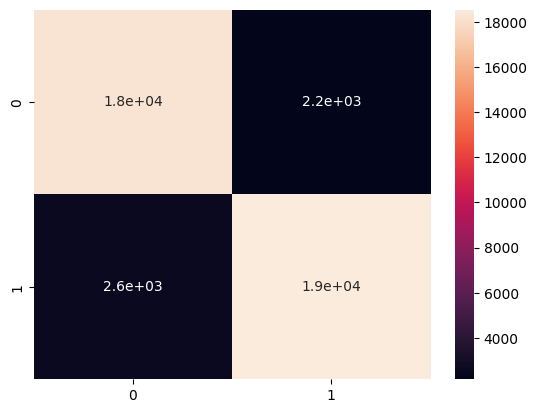

In [ ]:
# confusion matrix
cm = confusion_matrix(Y_Pred, Y_test)
print(cm)
sns.heatmap(cm, annot=True);

In [ ]:
print(classification_report(Y_test, Y_Pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88     20779
           1       0.88      0.90      0.89     20710

    accuracy                           0.89     41489
   macro avg       0.89      0.89      0.89     41489
weighted avg       0.89      0.89      0.89     41489



[back to top](#overview)

# model 2<a name = "model2"></a>
[back to top](#overview)

Training accuracy:  0.9872116685776855
Testing accuracy:  0.8864277278314734

confusion matrix:
[[18199  2172]
 [ 2580 18538]]

classification report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.89     20779
           1       0.88      0.90      0.89     20710

    accuracy                           0.89     41489
   macro avg       0.89      0.89      0.89     41489
weighted avg       0.89      0.89      0.89     41489



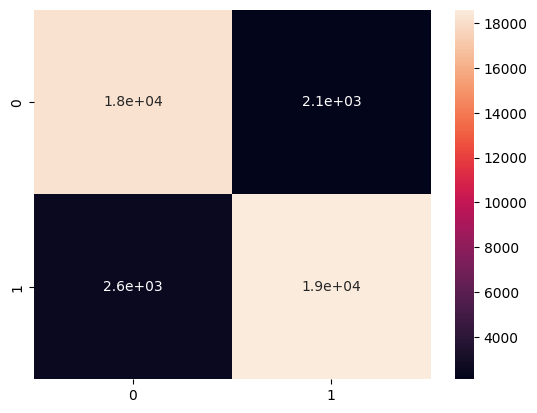

In [ ]:
dt1 = DecisionTreeClassifier(criterion = 'entropy')
dt1.fit(X_train, Y_train)
Y_Pred1 = dt1.predict(X_test)
Y_Pred1 = pd.DataFrame(Y_Pred1,columns=['TARGET'])
print("Training accuracy: ",dt1.score(X_train, Y_train))
print("Testing accuracy: ", dt1.score(X_test, Y_test))
print()
print("confusion matrix:")
cm1= confusion_matrix(Y_Pred1, Y_test)
print(cm)
print()
sns.heatmap(cm1, annot=True);
print("classification report:")
print(classification_report(Y_test, Y_Pred1))

In [ ]:
dt1.tree_.max_depth

62

[Back to top](#overview)


# model 3<a name = "model3"></a>

[Back to top](#overview)

Training accuracy:  0.8235871372937907
Testing accuracy:  0.8163850659210875
[[17062  3901]
 [ 3717 16809]]
              precision    recall  f1-score   support

           0       0.81      0.82      0.82     20779
           1       0.82      0.81      0.82     20710

    accuracy                           0.82     41489
   macro avg       0.82      0.82      0.82     41489
weighted avg       0.82      0.82      0.82     41489



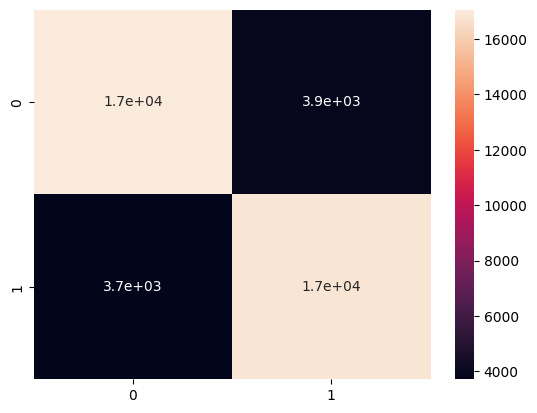

In [ ]:
dt2 = DecisionTreeClassifier(criterion = 'entropy',
                             max_depth = 20,
                             min_samples_split= 117,
                             min_samples_leaf = 10,
                             max_features='sqrt'
                             )
dt2.fit(X_train, Y_train)
Y_Pred2 = dt2.predict(X_test)
Y_Pred2 = pd.DataFrame(Y_Pred2,columns=['TARGET'])
print("Training accuracy: ",dt2.score(X_train, Y_train))
print("Testing accuracy: ", dt2.score(X_test, Y_test))
cm2= confusion_matrix(Y_Pred2, Y_test)
print(cm2)
sns.heatmap(cm2, annot=True);
print(classification_report(Y_test, Y_Pred2))

[Text(0.6813612941671341, 0.9761904761904762, 'x[282] <= 0.664\nentropy = 1.0\nsamples = 96807\nvalue = [48369, 48438]'),
 Text(0.38683924565339317, 0.9285714285714286, 'x[323] <= 0.009\nentropy = 1.0\nsamples = 95077\nvalue = [46902, 48175]'),
 Text(0.15197349971957375, 0.8809523809523809, 'x[1] <= 0.21\nentropy = 0.994\nsamples = 70350\nvalue = [31911, 38439]'),
 Text(0.07031688166012338, 0.8333333333333334, 'x[368] <= 0.005\nentropy = 0.741\nsamples = 24746\nvalue = [19555, 5191]'),
 Text(0.04304542905215928, 0.7857142857142857, 'x[182] <= 0.001\nentropy = 0.804\nsamples = 14063\nvalue = [10615, 3448]'),
 Text(0.024677509814918678, 0.7380952380952381, 'x[1] <= 0.18\nentropy = 0.98\nsamples = 5302\nvalue = [3091, 2211]'),
 Text(0.015703869882220976, 0.6904761904761905, 'x[276] <= 0.016\nentropy = 0.908\nsamples = 3077\nvalue = [2083, 994]'),
 Text(0.01346045989904655, 0.6428571428571429, 'x[323] <= 0.0\nentropy = 0.91\nsamples = 3052\nvalue = [2058, 994]'),
 Text(0.011217049915872126

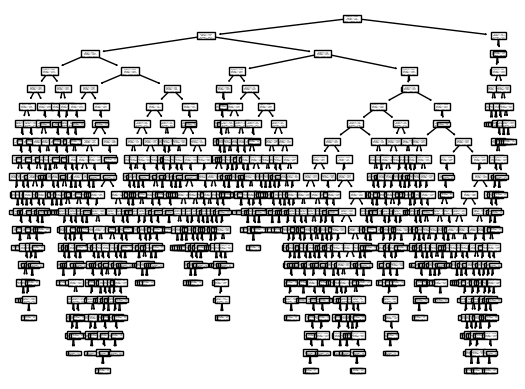

In [ ]:
# plotting decision tree
tree.plot_tree(dt2)

[back to top](#overview)

#Making predictions on kaggle testing dataset<a name = "kaggle"></a>
[back to top](#overview)

In [ ]:
test_data

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.100
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.720
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.950
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.610
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75813,151831,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40243.200
75814,151832,2,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,146961.300
75815,151833,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,167299.770
75816,151834,2,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979


In [ ]:
# normalizing test data

scaler = MinMaxScaler()
model=scaler.fit(test_data.iloc[:,1:])
scaled_data=model.transform(test_data.iloc[:,1:])

scaled_test_df = pd.DataFrame(scaled_data)

scaled_test_df.columns = test_data.iloc[:,1:].columns

scaled_test_df

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,0.999764,0.27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000004,0.000004,0.0,0.0,0.0,0.0,0.001361
1,0.999764,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000004,0.000004,0.0,0.0,0.0,0.0,0.001533
2,0.999764,0.18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000004,0.000004,0.0,0.0,0.0,0.0,0.001585
3,0.999764,0.19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000004,0.000004,0.0,0.0,0.0,0.0,0.006462
4,0.999764,0.18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000004,0.000004,0.0,0.0,0.0,0.0,0.002507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75813,0.999764,0.18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000004,0.000004,0.0,0.0,0.0,0.0,0.001351
75814,0.999764,0.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000004,0.000004,0.0,0.0,0.0,0.0,0.005045
75815,0.999764,0.19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000004,0.000004,0.0,0.0,0.0,0.0,0.005749
75816,0.999764,0.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000004,0.000004,0.0,0.0,0.0,0.0,0.004019


In [ ]:
# making predictions on test data
Y_Pred = dt2.predict(scaled_test_df)
print (Y_Pred)
Y_Pred = pd.DataFrame(Y_Pred,columns=['TARGET'])
Y_Pred

[0 0 1 ... 0 0 0]


,TARGET
0,0
1,0
2,1
3,0
4,0
...,...
75813,0
75814,0
75815,0
75816,0


In [ ]:
# formatting the result
result = pd.DataFrame({'ID':test_data['ID'], 'TARGET':Y_Pred['TARGET']})
result

,ID,TARGET
0,2,0
1,5,0
2,6,1
3,7,0
4,9,0
...,...,...
75813,151831,0
75814,151832,0
75815,151833,0
75816,151834,0


In [ ]:
# converting pandas dataframe to a csv file
result.to_csv("result.csv", index = False)

[back to top](#overview)